# Jupyter Notebook 常用技巧
- http://hyry.dip.jp/tech/slice/slice.html/35

- IPython Notebook使用浏览器作为界面，向后台的IPython服务器发送请求，并显示结果。
- 在浏览器的界面中使用单元(Cell)保存各种信息。
 + Cell有多种类型，经常使用的有表示格式化文本的Markdown单元，和表示代码的Code单元。
 + 每个代码单元都有一个输出区域，在Code单元中输入代码，按 Shift-Enter 将运行此代码，代码中最后一个表达式的值将输出区域显示。
 + 如果希望屏蔽输出，可以在最后一条语句之后添加一个分号：”;”。
 + 此外，代码中还可以使用print语句在输出区域中显示信息。
- 在Markdown单元中还可以直接使用Html和Javascript。

## 一、数学公式

- 在Markdown单元中可以使用LaTeX表示数学公式，例如\sqrt{x^2+y^2}。
- 数学公式的显示使用MathJax，缺省情况下，MathJax从网络上下载，如果希望离线使用它，需要在IPython Notebook中输入如下代码，把MathJax安装到本地磁盘中：

In [8]:
# from IPython.external.mathjax import install_mathjax
# install_mathjax()

In [2]:
from IPython.display import Latex
Latex(r"$\sqrt{x^2+y^2}$")    # Code单元的输出也可以显示为数学公式

<IPython.core.display.Latex object>

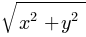

In [7]:
%load_ext sympyprinting
from sympy import *   # SymPy的表达式也可以显示为LaTex
x, y = symbols("x,y")
sqrt(x**2+y**2)

- 以%开头的为IPython的命令(Magic Command)，这里通过%load_ext命令载入sympyprinting扩展插件，载入此插件之后，所有的SymPy表达式都显示为数学公式。

## 二、图片显示

### 1 各种格式图片
- IPython.display模块中提供了许多显示Python返回值的类
- 例如下面的代码用Image类显示”python.png”图片，缺省路径为Notebook文件所在的目录：

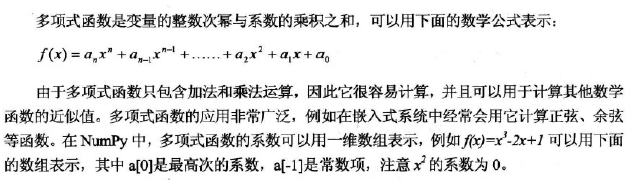

In [9]:
from IPython.display import Image
Image(filename="picture\polynomial function.png")

### 2 显示表示图像的字符串
- 通过cv2的imencode()将NumPy数组转换为一个表示PNG图像数据的数组，然后将此数组转换为字符串之后通过Image()将显示为图像：

In [10]:
import cv2
import numpy as np
from IPython.display import Image
img = np.random.randint(0,255,(250,250,3))
cv2.blur(img, (11,11), img)
r, dat = cv2.imencode(".png",img)
Image(dat.tostring())

ImportError: No module named cv2

### 3 其他
- 通过HTML和Javascript将Python代码的输出显示为Html，或者作为Javascript运行

In [11]:
from IPython.display import Javascript
Javascript("alert('ok')")

<IPython.core.display.Javascript object>

## 三、魔术命令（Magic command）
- IPython中Magic命令有两种执行方式
 + 以%开始的命令被称为行命令，它只对单行有效
 + 以%%开头的为单元命令，它放在单元的第一行，对整个单元有效
- 每个Magic命令都可以指定参数，可以输入timeit?查看其帮助文档
- 例如timeit命令可以快速测试代码的执行效率，它可以作为行命令或者单元命令。

In [12]:
%timeit 1 + 1
%timeit 1.0 + 1.0
%timeit "1" + "1"

10000000 loops, best of 3: 22.8 ns per loop
10000000 loops, best of 3: 22.7 ns per loop
10000000 loops, best of 3: 22.7 ns per loop


In [13]:
%%timeit
s = 0
for i in xrange(100):
    s += i

100000 loops, best of 3: 4.58 µs per loop


** 常用命令 **
> * %pylab
> * %load
> * %prun
> * %load_ext
> * 

1. %pylab命令将载入numpy和pylab，并且将这两个模块中的名字载入到全局名字空间中。
 + 缺省参数时，它使用matplotlib的缺省界面库显示图表，如果带inline参数则将图表作为图像插入到Notebook中。
 + 使用界面库显示图像时可以使用交互工具，而将图表直接插入到Notebook中则有利于编写文档。
- 下面的例子，plot和random是从pylab和numpy中载入的。

Populating the interactive namespace from numpy and matplotlib


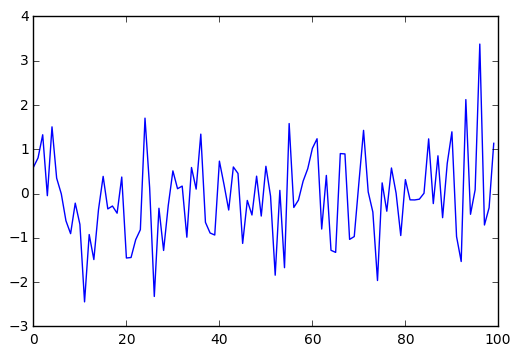

In [15]:
%pylab inline
plot(random.randn(100));

2. %load可以从文件或者网址载入代码到一个新的单元中
- 例如下面载入某个matplotlib的示例程序，并执行：

In [ ]:
%load http://matplotlib.org/_sources/examples/pylab_examples/histogram_percent_demo.txt

3. %prun用于代码的执行性能分析，可以作为行命令和单元命令使用。
- 下面的程序分析numpy.linalg.det()的性能：

In [ ]:
%%prun
for i in xrange(100):
    linalg.det(random.rand(10,10))

4. %load_ext载入IPython的扩展模块，通过它可以载入更多的Magic命令。
- 下面我们载入cythonmagic模块，并使用%%cython命令编译一个高效的频率统计函数count()。

In [ ]:
%load_ext cythonmagic